In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. Load the data
df_raw = pd.read_csv('./data/electricitydata.csv', low_memory=False)
df = df_raw

In [3]:
# 2. Start the descriptive analysis
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
df.tail()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.00,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.00,3571.00,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.00,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.00,3563.99,50.60
38013,31/12/2013 23:30,New Year's Eve,1,1,1,31,12,2013,47,1064.00,3624.25,33.83,5.00,16.70,308.01,1020.00,3517.08,34.90


In [5]:
df.shape

(38014, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [7]:
# 3. Pre-process the data
num_columns = ['ForecastWindProduction', 'SystemLoadEA', 
               'SMPEA', 'ORKTemperature', 'ORKWindspeed', 
               'CO2Intensity', 'ActualWindProduction', 
               'SystemLoadEP2', 'SMPEP2']

for col in num_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38009 non-null  float64       
 10  SystemLoadEA            38012 non-null  float64       
 11  SMPEA                   38012 non-null  float64       
 12  ORKTemperature          37719 non-null  float6

In [10]:
# Assuming that your data is in a pandas DataFrame called 'df'
# First, let's create a new dataframe that will hold the filled in values
df_filled = df.copy()

# Loop over columns in the dataframe
for col in df.columns:
    # Find indices of the null values in the column
    null_indices = df[col][df[col].isnull()].index
    
    # Loop over null indices and fill them in
    for i in null_indices:
        # Get the indices of the 5 non-null values before and after the null value
        before = df[col].iloc[max(i-5,0):i][df[col].iloc[max(i-5,0):i].notnull()].index
        after = df[col].iloc[i:min(i+6,len(df)-1)][df[col].iloc[i:min(i+6,len(df)-1)].notnull()].index
        
        # Take the mean of the non-null values before and after
        mean = np.mean(df[col].iloc[before.union(after)])
        
        # Fill in the null value with the mean in the new dataframe
        df_filled.at[i, col] = mean
        
# If any empty values are leftover they will be deleted
df = df_filled.copy()
df = df.dropna()

In [11]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38000 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38000 non-null  datetime64[ns]
 1   Holiday                 38000 non-null  object        
 2   HolidayFlag             38000 non-null  int64         
 3   DayOfWeek               38000 non-null  int64         
 4   WeekOfYear              38000 non-null  int64         
 5   Day                     38000 non-null  int64         
 6   Month                   38000 non-null  int64         
 7   Year                    38000 non-null  int64         
 8   PeriodOfDay             38000 non-null  int64         
 9   ForecastWindProduction  38000 non-null  float64       
 10  SystemLoadEA            38000 non-null  float64       
 11  SMPEA                   38000 non-null  float64       
 12  ORKTemperature          38000 non-null  float6

C:\Users\ahmad\AppData\Local\Temp\ipykernel_34208\4244191777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


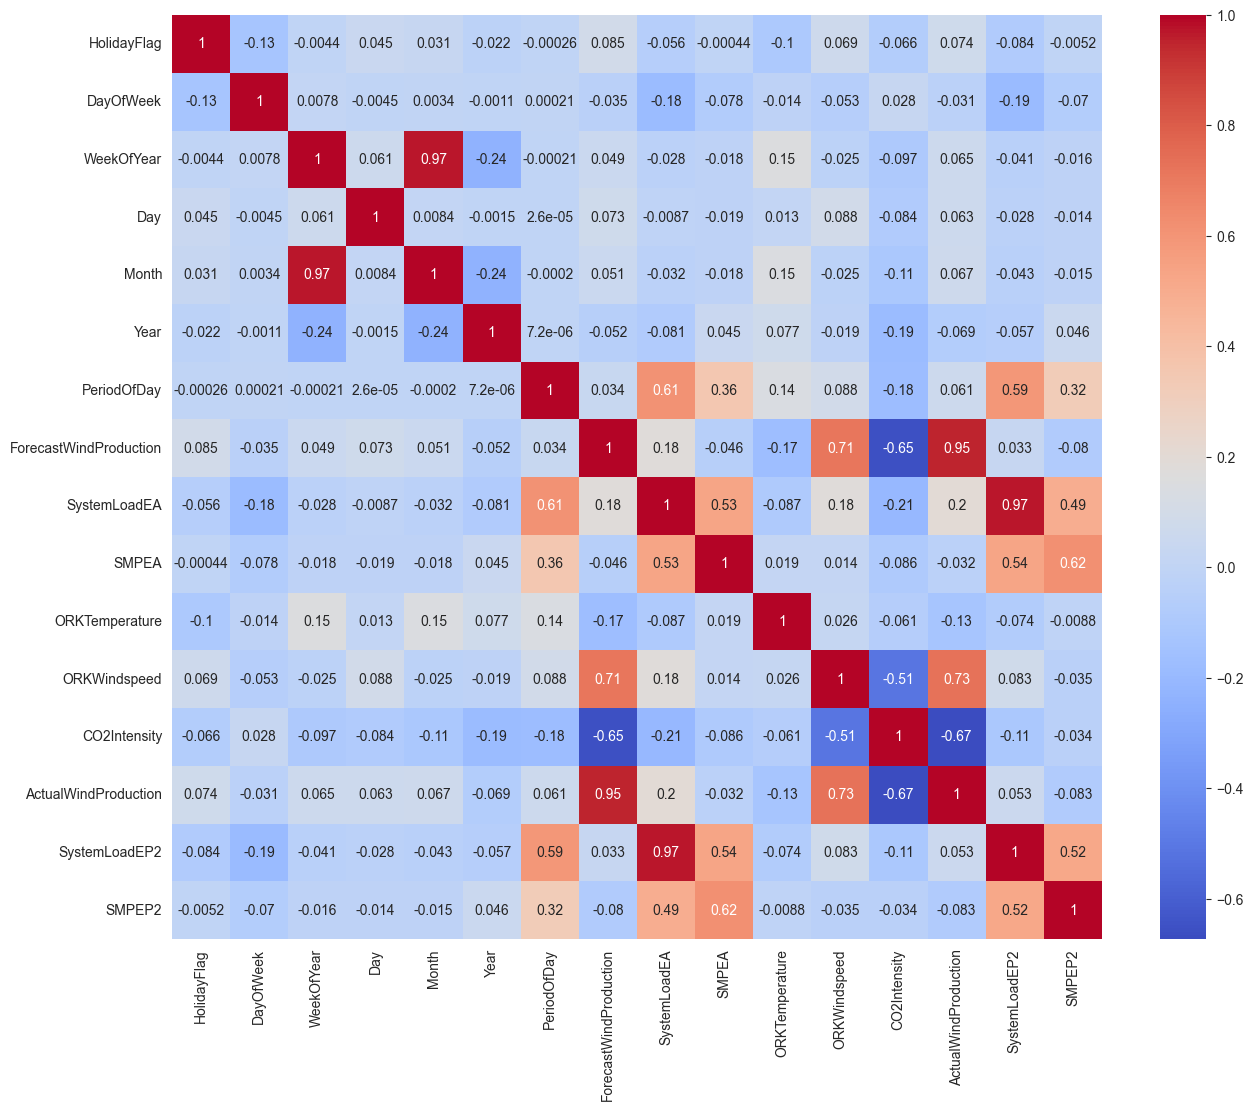

In [13]:
# 4. Start the analysis
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.show()

In [14]:
df.corrwith(df['SMPEP2'], axis=0).sort_values(ascending=False)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_34208\819872605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['SMPEP2'], axis=0).sort_values(ascending=False)


SMPEP2                    1.000000
SMPEA                     0.617149
SystemLoadEP2             0.516816
SystemLoadEA              0.490823
PeriodOfDay               0.323050
Year                      0.045983
HolidayFlag              -0.005199
ORKTemperature           -0.008837
Day                      -0.013566
Month                    -0.015491
WeekOfYear               -0.016382
CO2Intensity             -0.033902
ORKWindspeed             -0.035039
DayOfWeek                -0.069624
ForecastWindProduction   -0.080086
ActualWindProduction     -0.083315
dtype: float64

In [15]:
data = df[['SMPEA', 'SystemLoadEP2', 'SystemLoadEA', 'PeriodOfDay', 'SMPEP2']]

In [16]:
seed = 6
k = 10

# Create random list for the input
np.random.seed(seed)
idx = np.random.permutation(len(data))
x = data.iloc[idx].drop('SMPEP2', axis=1)
y = data['SMPEP2'].iloc[idx]

# Split the data into k folds
folds = np.array_split(range(len(x)), k)

In [17]:
# Initialize dictionary to store scores for each fold
dt_scores = {'MSE': [], 'R-squared': []}

for i in range(k):
    # Split the data into train and test sets
    test_indices = folds[i]
    train_indices = np.concatenate([folds[j] for j in range(k) if j != i])

    x_train, x_test = x.iloc[train_indices], x.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Fit the decision tree model
    tree_model = DecisionTreeRegressor(max_depth=50, random_state=seed)
    tree_model.fit(x_train, y_train)

    # Make predictions on the test set
    tree_predict = tree_model.predict(x_test)

    # Compute the mean squared error and R-squared score
    mse = np.sqrt(mean_squared_error(y_test, tree_predict))
    r_squared = r2_score(y_test, tree_predict)

    # Append the scores to the dictionary
    dt_scores['MSE'].append(mse)
    dt_scores['R-squared'].append(r_squared)

    print(mse)
    print(r_squared)
    
# Calculate mean and standard deviation of MSE
dt_mse_mean = np.mean(dt_scores['MSE'])
dt_mse_std = np.std(dt_scores['MSE'])

# Calculate mean and standard deviation of R-squared
dt_rsq_mean = np.mean(dt_scores['R-squared'])
dt_rsq_std = np.std(dt_scores['R-squared'])

# Print the results
print("Mean MSE:", dt_mse_mean)
print("MSE standard deviation:", dt_mse_std)
print("Mean R-squared:", dt_rsq_mean)
print("R-squared standard deviation:", dt_rsq_std)

34.02513154466238
0.1091938069412075
39.46354216235537
-0.07535263840405038
34.25229569755334
0.11729526350025776
30.130070101845188
0.18511170103321917
32.2725604084304
0.17075474603744345
32.596219120837986
0.1496157744086254
33.255732044503084
0.14736064908294866
31.726596319084592
0.03957697124108217
29.731606347454555
0.17802037239976565
35.01920838437701
0.13966507583185817
Mean MSE: 33.24729621311039
MSE standard deviation: 2.62983312533525
Mean R-squared: 0.11612417220723574
R-squared standard deviation: 0.07536493997413814


In [18]:
# Initialize dictionary to store scores for each fold
rf_scores = {'MSE': [], 'R-squared': []}

for i in range(k):
    # Split the data into train and test sets
    test_indices = folds[i]
    train_indices = np.concatenate([folds[j] for j in range(k) if j != i])

    x_train, x_test = x.iloc[train_indices], x.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Fit the random forest model
    forest_model = RandomForestRegressor(random_state=seed)
    forest_model.fit(x_train, y_train)

    # Make predictions on the test set
    forest_predict = forest_model.predict(x_test)

    # Compute the mean squared error and R-squared score
    mse = np.sqrt(mean_squared_error(y_test, forest_predict))
    r_squared = r2_score(y_test, forest_predict)

    # Append the scores to the dictionary
    rf_scores['MSE'].append(mse)
    rf_scores['R-squared'].append(r_squared)
    
    print(mse)
    print(r_squared)
    
# Calculate mean and standard deviation of MSE
rf_mse_mean = np.mean(rf_scores['MSE'])
rf_mse_std = np.std(rf_scores['MSE'])

# Calculate mean and standard deviation of R-squared
rf_rsq_mean = np.mean(rf_scores['R-squared'])
rf_rsq_std = np.std(rf_scores['R-squared'])

# Print the results
print("Mean MSE:", rf_mse_mean)
print("MSE standard deviation:", rf_mse_std)
print("Mean R-squared:", rf_rsq_mean)
print("R-squared standard deviation:", rf_rsq_std)

24.671345248880304
0.5316513599662114
28.277537607725126
0.44786922562634557
25.825471544100505
0.4981977459873401
22.63205793938481
0.5402244314738012
24.055382300985883
0.539276169324976
23.606561618577988
0.553988344054458
24.19490864776587
0.5486844251527467
21.297882196121204
0.5671988158121744
21.103472747299932
0.5858743204476458
26.742758171450713
0.4982732019597329
Mean MSE: 24.240737802229233
MSE standard deviation: 2.162914257499385
Mean R-squared: 0.5311238039805433
R-squared standard deviation: 0.037913534658017486


In [19]:
# Initialize dictionary to store scores for each fold
svr_scores = {'MSE': [], 'R-squared': []}

for i in range(k):
    # Split the data into train and test sets
    test_indices = folds[i]
    train_indices = np.concatenate([folds[j] for j in range(k) if j != i])

    x_train, x_test = x.iloc[train_indices], x.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Fit the svr model
    svr_model = SVR(kernel='linear')
    svr_model.fit(x_train, y_train)

    # Make predictions on the test set
    svr_predict = svr_model.predict(x_test)

    # Compute the mean squared error and R-squared score
    mse = np.sqrt(mean_squared_error(y_test, svr_predict))
    r_squared = r2_score(y_test, svr_predict)

    # Append the scores to the dictionary
    svr_scores['MSE'].append(mse)
    svr_scores['R-squared'].append(r_squared)
    
    print(mse)
    print(r_squared)
    
# Calculate mean and standard deviation of MSE
svr_mse_mean = np.mean(svr_scores['MSE'])
svr_mse_std = np.std(svr_scores['MSE'])

# Calculate mean and standard deviation of R-squared
svr_rsq_mean = np.mean(svr_scores['R-squared'])
svr_rsq_std = np.std(svr_scores['R-squared'])

# Print the results
print("Mean MSE:", svr_mse_mean)
print("MSE standard deviation:", svr_mse_std)
print("Mean R-squared:", svr_rsq_mean)
print("R-squared standard deviation:", svr_rsq_std)

26.595248884754337
0.4557584188560504
30.8843272418323
0.3413797674453757
28.698354463875283
0.3803448284386981
25.66870292509695
0.4085668747930077
27.64849235521228
0.39136200664461596
27.20297081500515
0.4077386264065801
27.244750490917987
0.42773390274421486
24.313047840366252
0.4359801241609632
23.54522876382078
0.48449826110947336
28.90800243334383
0.4137389129040082
Mean MSE: 27.070912621422515
MSE standard deviation: 2.077873122984858
Mean R-squared: 0.4147101723502987
R-squared standard deviation: 0.037905292727261945


In [ ]:
x = data.iloc[idx].drop('SMPEP2', axis=1)
y = data['SMPEP2'].iloc[idx]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
fm_predict = forest_model.predict(x_test)
tree_predict = tree_model.predict(x_test)
svr_predict = svr_model.predict(x_test)
data_comparison = pd.DataFrame({'Forest_Predict':fm_predict-y_test,
                                'Tree_Predict':tree_predict-y_test,
                                #'SVR_Predict':svr_predict-y_test,
                                'Label':y_test})

NameError: name 'data' is not defined

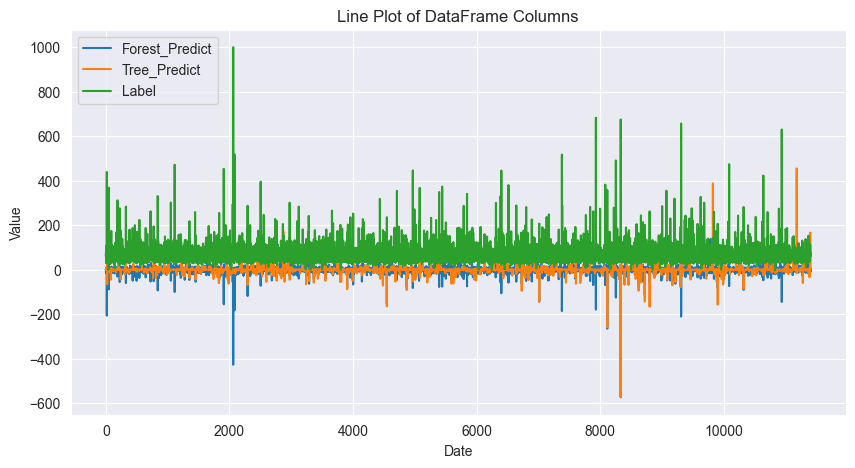

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
for col in data_comparison.columns:
    ax.plot(range(1, data_comparison.shape[0] + 1), data_comparison[col], label=col)

# Add a legend and axis labels
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Line Plot of DataFrame Columns')
plt.show()

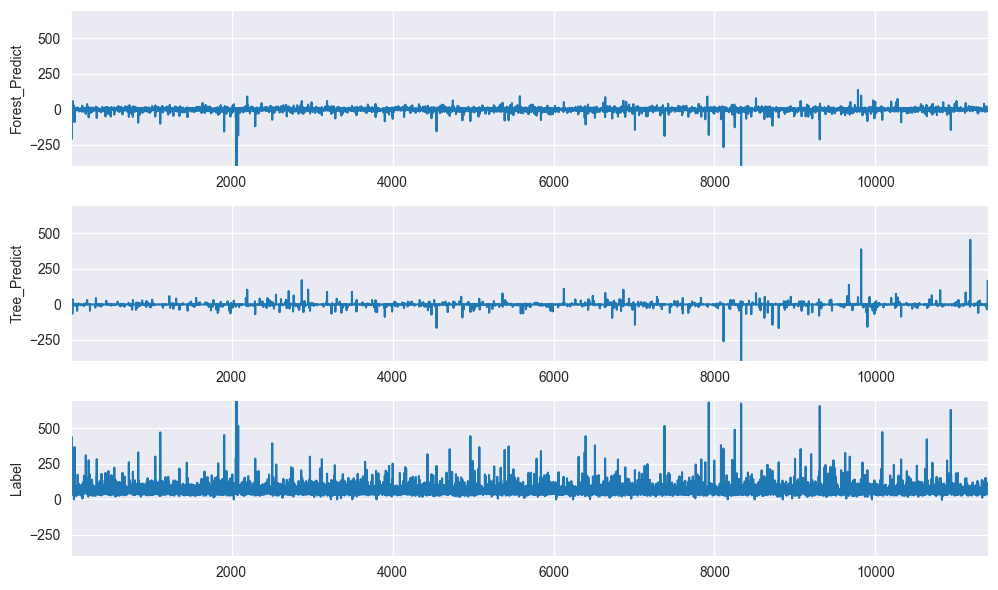

In [22]:
fig, axs = plt.subplots(nrows=len(data_comparison.columns), ncols=1, figsize=(10, len(data_comparison.columns)*2))
x = range(1, len(data_comparison)+1)

for i, col in enumerate(data_comparison.columns):
    axs[i].plot(x, data_comparison[col])
    axs[i].set_xlim([1, len(data_comparison)])
    axs[i].set_ylim([-400, 700])
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

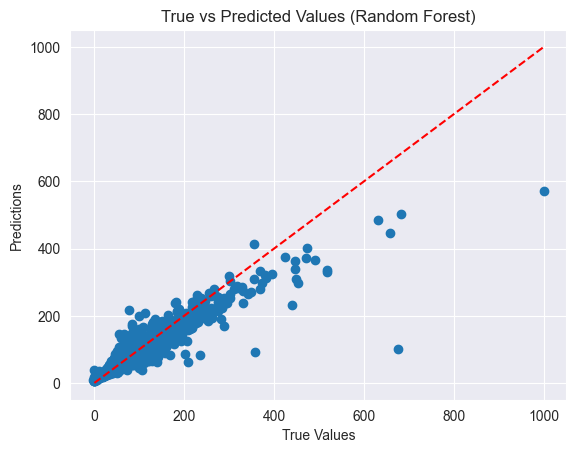

In [23]:
plt.scatter(y_test, fm_predict)
plt.plot([0, 1000], [0, 1000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values (Random Forest)")
plt.show()

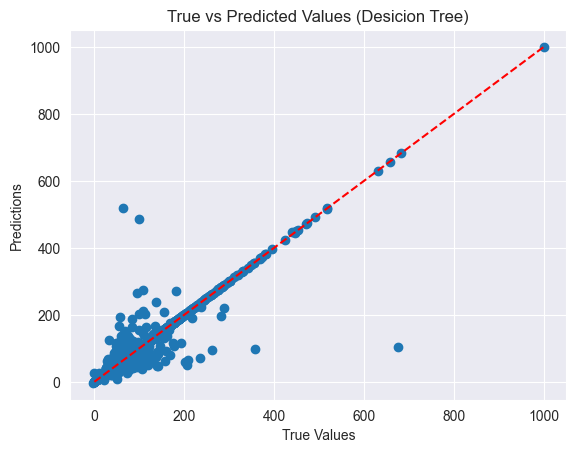

In [24]:
plt.scatter(y_test, tree_predict)
plt.plot([0, 1000], [0, 1000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values (Desicion Tree)")
plt.show()

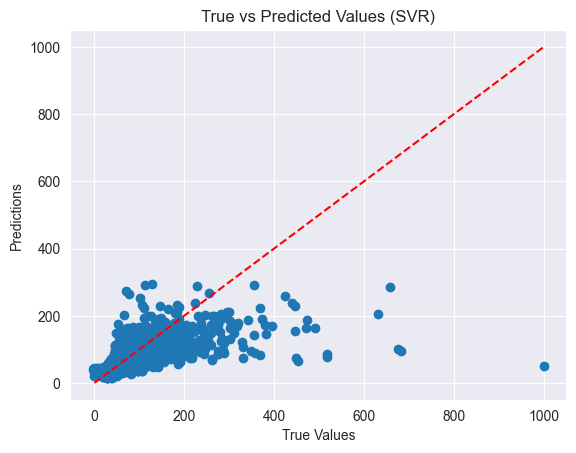

In [25]:
plt.scatter(y_test, svr_predict)
plt.plot([0, 1000], [0, 1000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values (SVR)")
plt.show()